In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from sklearn.preprocessing import MinMaxScaler as scaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/happiness.csv')
df.head() 
df = df.dropna() 
#df['happiness_total'] = df['Positive affect'] - df['Negative affect']
df.head() 

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,happiness_total
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,0.260
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,0.347
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,0.343
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,0.344
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,0.442


In [3]:
df.columns 


Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'happiness_total'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 1707
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1708 non-null   object 
 1   year                              1708 non-null   int64  
 2   Life Ladder                       1708 non-null   float64
 3   Log GDP per capita                1708 non-null   float64
 4   Social support                    1708 non-null   float64
 5   Healthy life expectancy at birth  1708 non-null   float64
 6   Freedom to make life choices      1708 non-null   float64
 7   Generosity                        1708 non-null   float64
 8   Perceptions of corruption         1708 non-null   float64
 9   Positive affect                   1708 non-null   float64
 10  Negative affect                   1708 non-null   float64
 11  happiness_total                   1708 non-null   float64
dtypes: flo

In [5]:
np.sort(df.year.unique())

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

In [6]:
df.describe() 

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,happiness_total
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.00000,1708.000000,1708.000000
mean,2013.289227,5.446680,9.321709,0.810321,63.225465,0.739442,-0.000638,0.750996,0.70955,0.269446,0.440104
std,4.073657,1.136592,1.158344,0.121638,7.687011,0.142846,0.162103,0.186028,0.10819,0.083083,0.158387
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.32200,0.094000,-0.274000
25%,2010.000000,4.595000,8.394000,0.741000,58.175000,0.644000,-0.111250,0.697000,0.62300,0.208000,0.335750
50%,2013.000000,5.364000,9.456500,0.835000,65.100000,0.757500,-0.025500,0.806000,0.72200,0.259000,0.462000
75%,2017.000000,6.259000,10.272000,0.908000,68.685000,0.852000,0.089000,0.875000,0.80125,0.319250,0.563000
max,2020.000000,7.971000,11.648000,0.987000,77.100000,0.985000,0.689000,0.983000,0.94400,0.705000,0.817000


Exploratory Data Analysis

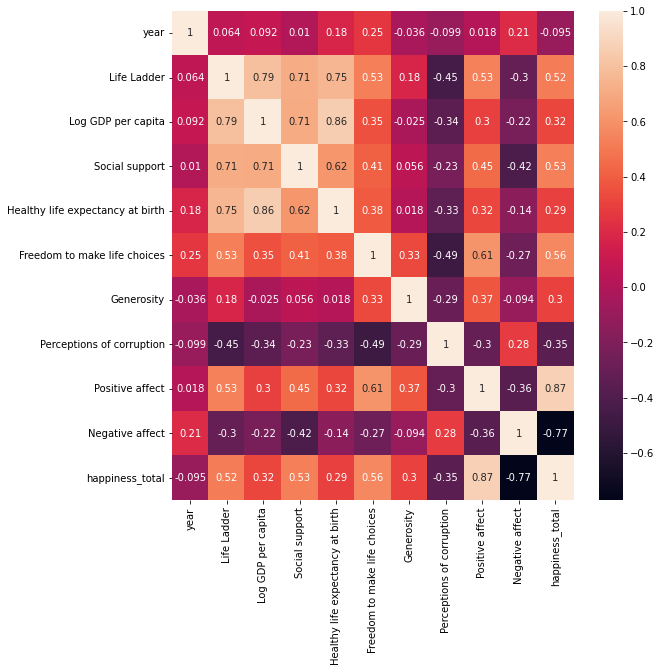

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True)

#Univariate Analysis

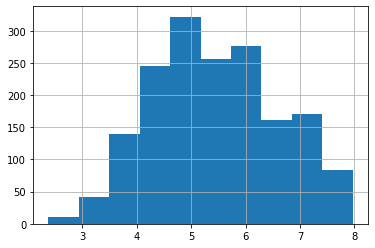

In [ ]:
df['Life Ladder'].hist() 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


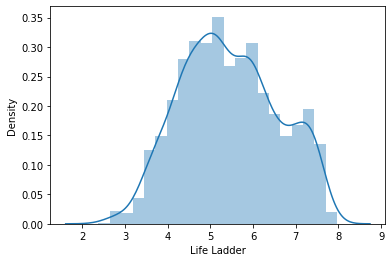

In [ ]:
sns.distplot(df['Life Ladder'])

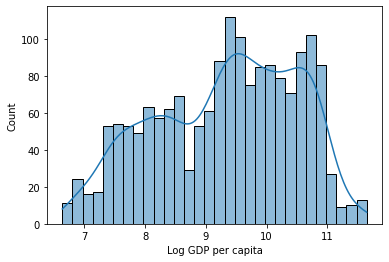

In [ ]:
sns.histplot(data=df, x="Log GDP per capita", bins=30, kde=True)

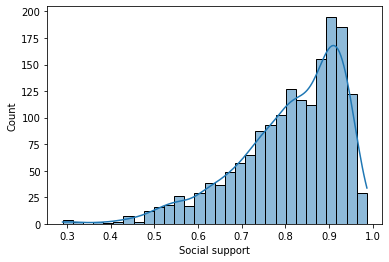

In [ ]:
sns.histplot(data=df, x="Social support", bins=30, kde=True)

# semakin tinggi social life seseorang bisa menentukan juga tingkat kebahagiaan
# karena manusia ada makhluk sosial, social life yang mendukung biasanya juga memacu indivdu tersebut untuk semakin maju (upgrade)

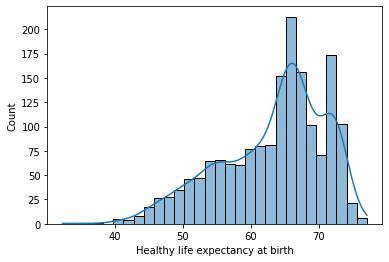

In [ ]:
sns.histplot(data=df, x="Healthy life expectancy at birth", bins=30, kde=True)

# Orang-orang umur dari 60-70, mereka berharap hidup mereka sudah tidak susah/sehat 
# karena dari sudut pandang manusia umumnya memang mereka tidak ingin menyusahkan iorang disekitarnya
# berdasarkan gajinya (tingkat kekayaan), kesehatan

#Bivariate Analysis

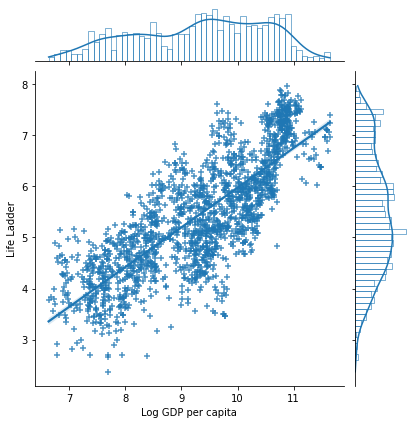

In [ ]:
sns.jointplot(x='Log GDP per capita',y='Life Ladder',data=df, kind='reg', marker="+", marginal_kws=dict(bins=50, fill=False))

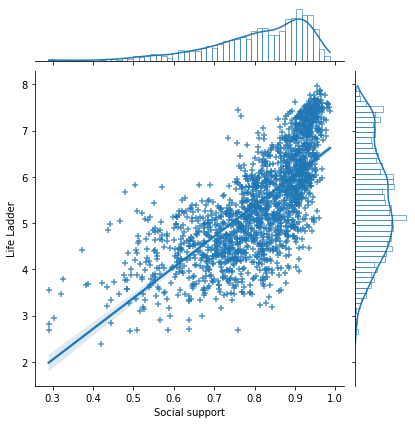

In [7]:
sns.jointplot(x='Social support',y='Life Ladder',data=df, kind='reg', marker="+", marginal_kws=dict(bins=50, fill=False))

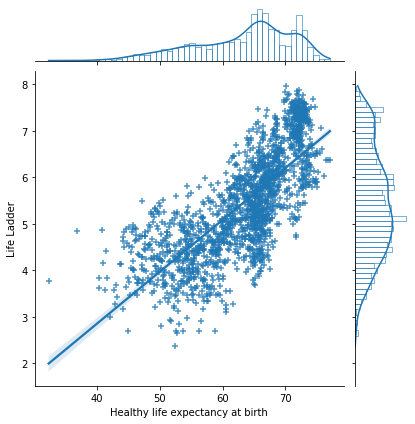

In [8]:
sns.jointplot(x='Healthy life expectancy at birth',y='Life Ladder',data=df, kind='reg', marker="+", marginal_kws=dict(bins=50, fill=False))

# Bagian Baru

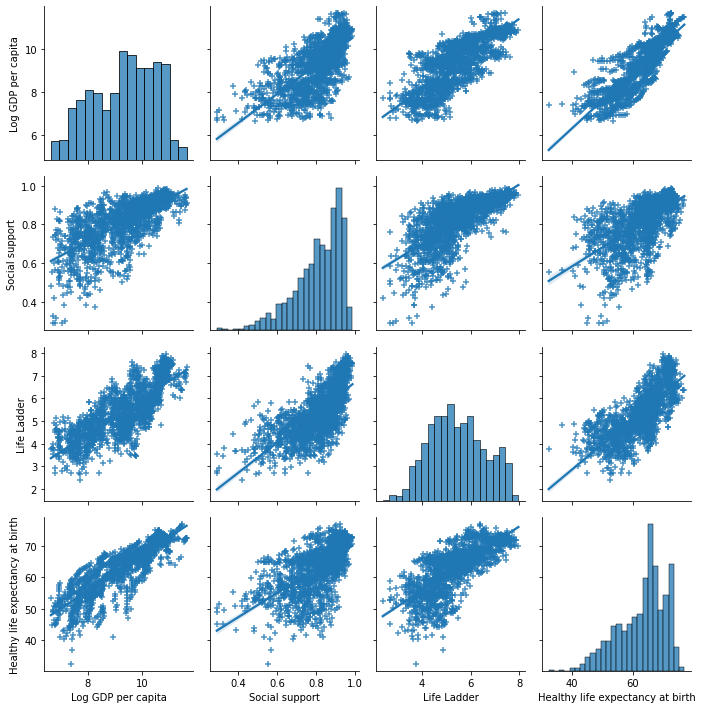

In [ ]:
sns.pairplot(df[['Log GDP per capita', "Social support",'Life Ladder', "Healthy life expectancy at birth"]], kind="reg", markers="+")


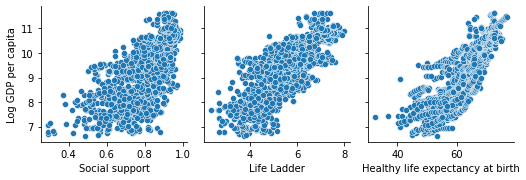

In [ ]:
sns.pairplot(data=df , y_vars='Log GDP per capita', x_vars = ["Social support",'Life Ladder', "Healthy life expectancy at birth"])

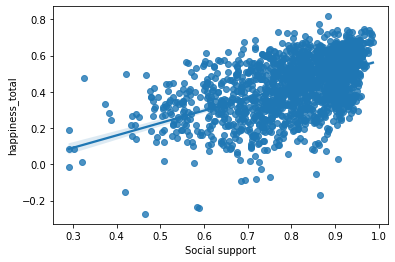

In [ ]:
sns.regplot(y='happiness_total', x='Social support', data=df)

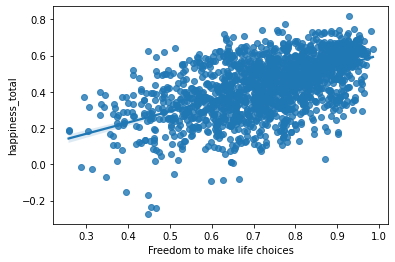

In [ ]:
sns.regplot(y='happiness_total', x='Freedom to make life choices', data=df)

#Sorting Countries best to worst (top 5 and last 5)

In [ ]:
negara_terbaik = df.groupby(by='Country name').mean().reset_index().sort_values(by='Life Ladder', ascending=False).iloc[:5][['Country name']]
negara_terendah = df.groupby(by='Country name').mean().reset_index().sort_values(by='Life Ladder', ascending=False).iloc[-5:][['Country name']]

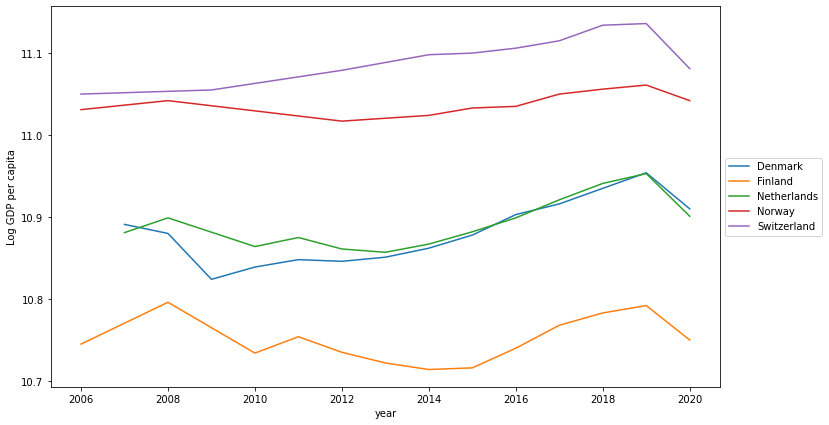

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(x='year', y='Log GDP per capita', data=df[df['Country name'].isin(negara_terbaik['Country name'].to_list())], hue='Country name')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

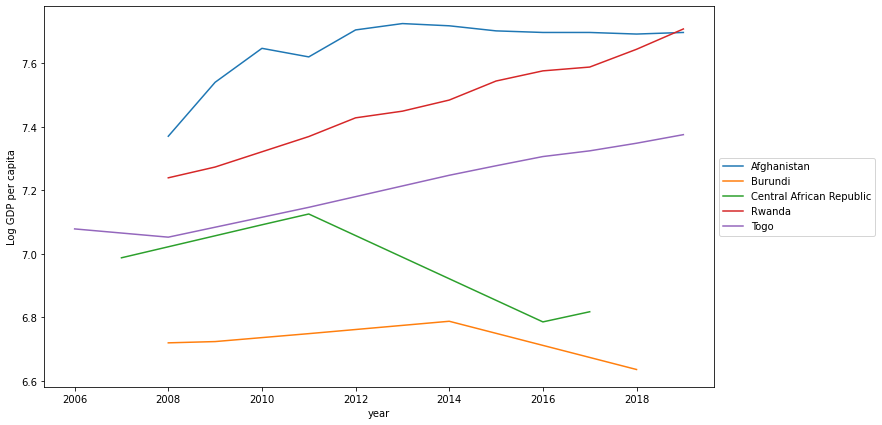

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(x='year', y='Log GDP per capita', data=df[df['Country name'].isin(negara_terendah['Country name'].to_list())], hue='Country name')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
country_list = negara_terbaik.append(negara_terendah)

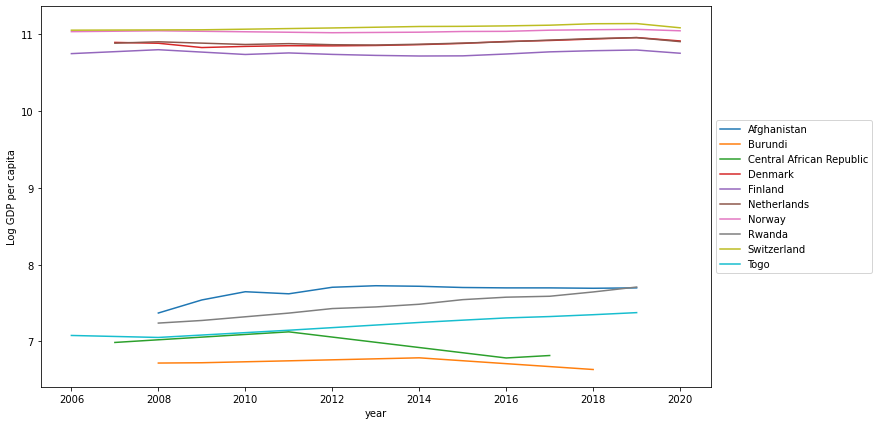

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(x='year', y='Log GDP per capita', data=df[df['Country name'].isin(country_list['Country name'].to_list())], hue='Country name')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

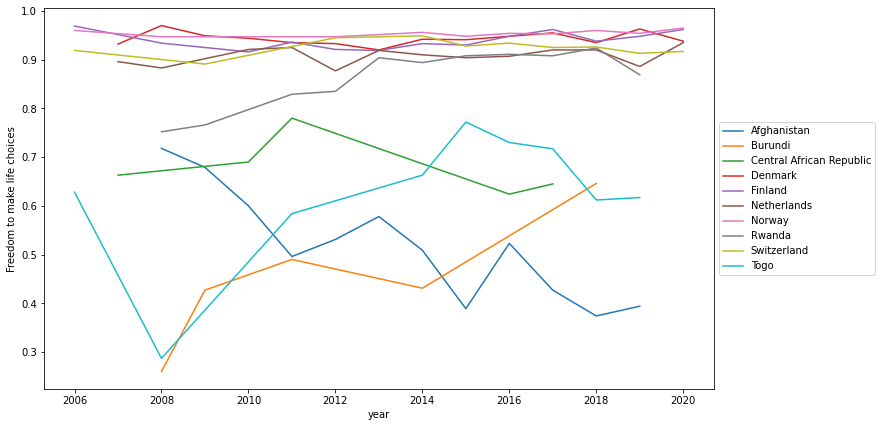

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(x='year', y='Freedom to make life choices', data=df[df['Country name'].isin(country_list['Country name'].to_list())], hue='Country name')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [ ]:
data_perbandingan = df[df['Country name'].isin(country_list['Country name'].to_list())]

In [ ]:
data_perbandingan.sort_values(by='Life Ladder', ascending=False, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_perbandingan[data_perbandingan['year'] == 2019]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,happiness_total
512,Finland,2019,7.780,10.792,0.937,72.0,0.948,-0.052,0.195,0.755,0.181,0.574
1474,Switzerland,2019,7.694,11.136,0.949,74.4,0.913,0.036,0.294,0.798,0.171,0.627
421,Denmark,2019,7.693,10.954,0.958,72.7,0.963,0.020,0.174,0.862,0.181,0.681
1171,Norway,2019,7.442,11.061,0.942,73.3,0.954,0.111,0.271,0.823,0.195,0.628
1093,Netherlands,2019,7.425,10.953,0.941,72.4,0.886,0.213,0.360,0.838,0.231,0.607
1536,Togo,2019,4.179,7.375,0.539,55.1,0.617,0.065,0.737,0.590,0.444,0.146
1309,Rwanda,2019,3.268,7.708,0.489,61.7,0.869,0.064,0.168,0.736,0.418,0.318
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502,-0.151


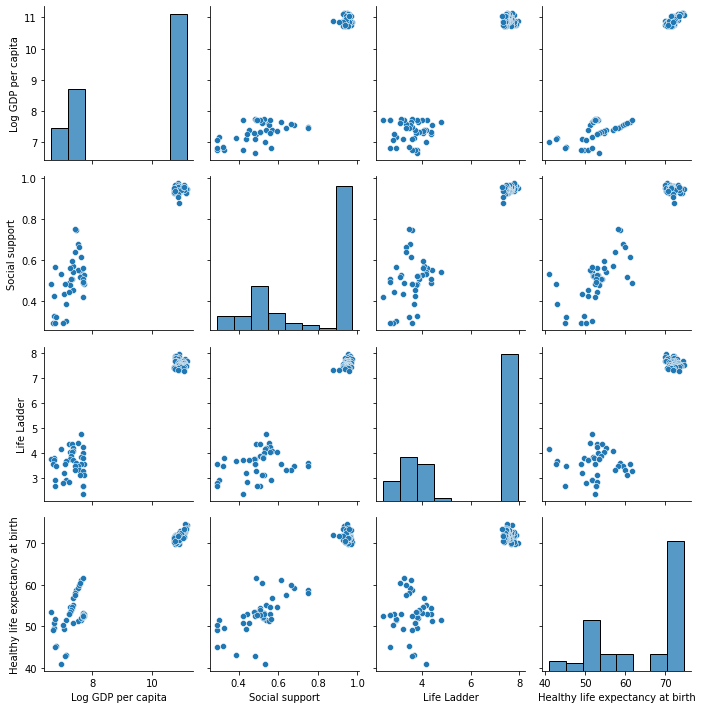

In [ ]:
sns.pairplot(data_perbandingan[['Log GDP per capita', "Social support",'Life Ladder', "Healthy life expectancy at birth"]])

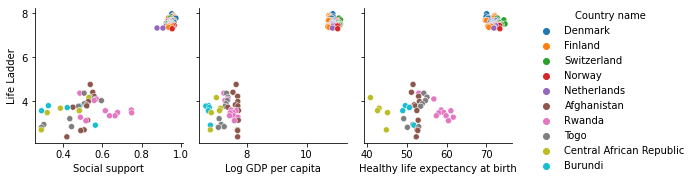

In [ ]:
sns.pairplot(data=data_perbandingan , y_vars='Life Ladder', x_vars = ["Social support",'Log GDP per capita', "Healthy life expectancy at birth"], hue='Country name')

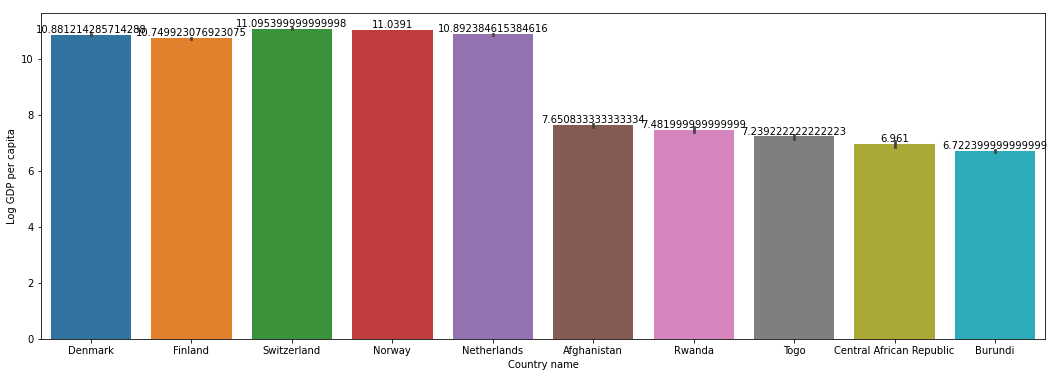

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.barplot(x="Country name", y="Log GDP per capita", data=data_perbandingan)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'\n{p.get_height()}', (x, y), ha='center', va='bottom')

# pendepatan suatu negara (filter top 5 and last 5 by life ladder) sangat mempengaruhi kebahagiaan
# Rata-rata negara top 5 memang negara yang maju, sedangkan negara-negara last 5 adalah negara berkembang
# dapat dismpulkan negara maju memang tingkat kesejahteraannya sudah merata, di bandingkan negara berkembang

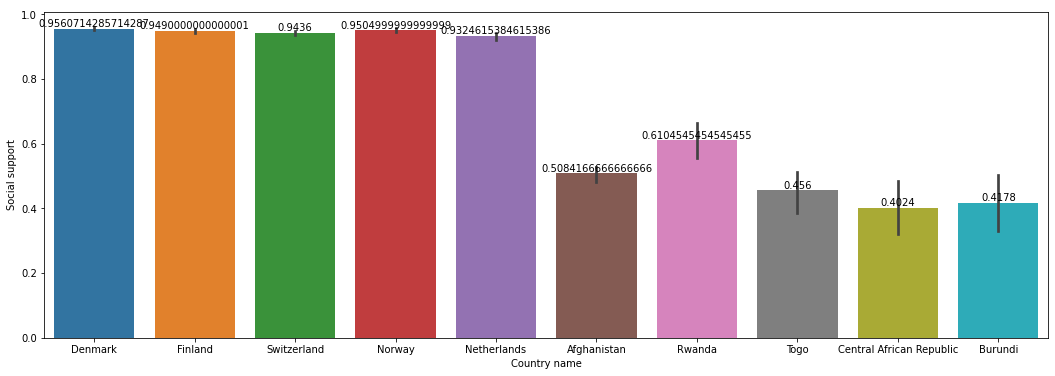

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.barplot(x="Country name", y="Social support", data=data_perbandingan)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'\n{p.get_height()}', (x, y), ha='center', va='bottom')

# negara-negara last 5, memiliki nilai yang rendah karena mungkin saha di sana adanya perang (Afgahnistan)
# kesenjangan sosial yang sangat tinggi atau pun karena di sana pokok pangannnya belum terpenuhi (Africa)

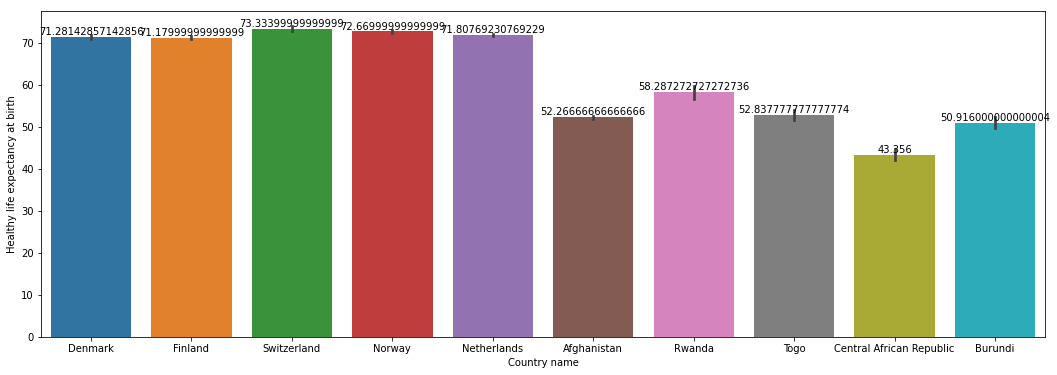

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.barplot(x="Country name", y="Healthy life expectancy at birth", data=data_perbandingan)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'\n{p.get_height()}', (x, y), ha='center', va='bottom')

# negara-negara top 5 berdasarkan dari data luar, long life expetacion memang tinggi di banding last 5
# bisa di kaitkan dengan social support, GDP (pelengkap dan penunjang untuk ke-5 indra manusia)


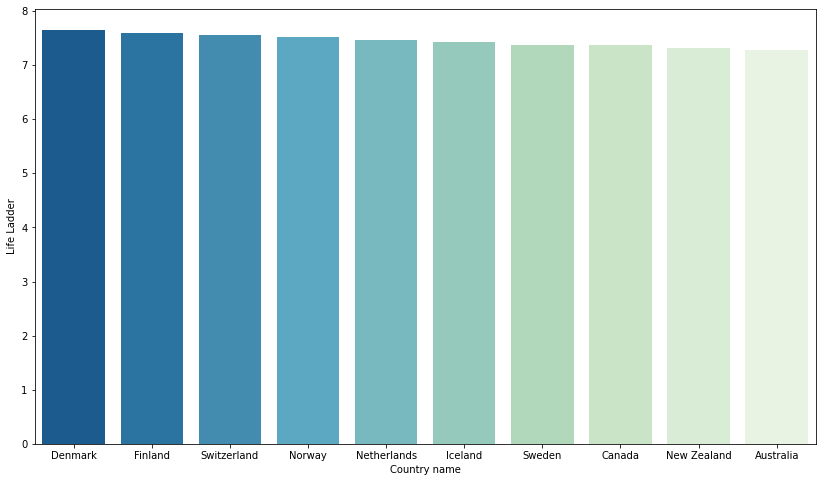

In [9]:
plt.figure(figsize=(14,8)) 
data = df.groupby(by='Country name').mean().reset_index().sort_values(by='Life Ladder', ascending=False).head(10) 
sns.barplot(y='Life Ladder', x='Country name', data=data, palette='GnBu_r', ci=None)

In [24]:
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cat_dtypes = ['object']

# masukkan ke subset
num_df = df.select_dtypes(include=num_dtypes)
cat_df = df.select_dtypes(include = cat_dtypes)
numerik = num_df.columns
kategori = cat_df.columns


In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
scaler = MinMaxScaler() 
scaled=[] 
for x in numerik : 
 df[x+ ' ' + 'scaled'] = scaler.fit_transform(df[[x]]) 
 scaled.append(x + ' ' + 'scaled') 

In [26]:
filtered = df[[f for f in scaled]] 
Q1 = np.quantile(filtered['happiness_total scaled'],0.25)  
Q3 = np.quantile(filtered['happiness_total scaled'],0.75) 
IQR = Q3-Q1  
low = Q1-(1.5 * IQR) 
high = Q3+(1.5 * IQR)
filtered_entries = ((filtered['happiness_total scaled'] > low) | (filtered['happiness_total scaled']< high))
filtered = filtered[filtered_entries] 

In [28]:
filtered

,year scaled,Life Ladder scaled,Log GDP per capita scaled,Social support scaled,Healthy life expectancy at birth scaled,Freedom to make life choices scaled,Generosity scaled,Perceptions of corruption scaled,Positive affect scaled,Negative affect scaled,happiness_total scaled,year scaled scaled,Life Ladder scaled scaled,Log GDP per capita scaled scaled,Social support scaled scaled,Healthy life expectancy at birth scaled scaled,Freedom to make life choices scaled scaled,Generosity scaled scaled,Perceptions of corruption scaled scaled,Positive affect scaled scaled,Negative affect scaled scaled,happiness_total scaled scaled
0,0.200000,0.241065,0.146619,0.230990,0.412946,0.632737,0.491211,0.893460,0.315113,0.268412,0.489459,0.200000,0.241065,0.146619,0.230990,0.412946,0.632737,0.491211,0.893460,0.315113,0.268412,0.489459
1,0.266667,0.362223,0.180531,0.375897,0.421875,0.579092,0.512695,0.859705,0.421222,0.234043,0.569203,0.266667,0.362223,0.180531,0.375897,0.421875,0.579092,0.512695,0.859705,0.421222,0.234043,0.569203
2,0.333333,0.425840,0.201875,0.357245,0.430804,0.470426,0.445312,0.708861,0.475884,0.296236,0.565536,0.333333,0.425840,0.201875,0.357245,0.430804,0.470426,0.445312,0.708861,0.475884,0.296236,0.565536
3,0.400000,0.260365,0.196489,0.331420,0.437946,0.327373,0.485352,0.734177,0.464630,0.283142,0.566453,0.400000,0.260365,0.196489,0.331420,0.437946,0.327373,0.485352,0.734177,0.464630,0.283142,0.566453
4,0.466667,0.251608,0.213445,0.331420,0.445089,0.375516,0.557617,0.781646,0.623794,0.284779,0.656279,0.466667,0.251608,0.213445,0.331420,0.445089,0.375516,0.557617,0.781646,0.623794,0.284779,0.656279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,0.733333,0.243031,0.269100,0.685796,0.493304,0.653370,0.234375,0.726793,0.668810,0.188216,0.736022,0.733333,0.243031,0.269100,0.685796,0.493304,0.653370,0.234375,0.726793,0.668810,0.188216,0.736022
1704,0.800000,0.225697,0.275484,0.665710,0.506696,0.680880,0.231445,0.755274,0.778135,0.212766,0.784601,0.800000,0.225697,0.275484,0.665710,0.506696,0.680880,0.231445,0.755274,0.778135,0.212766,0.784601
1705,0.866667,0.221766,0.282067,0.695839,0.520089,0.694635,0.260742,0.853376,0.623794,0.193126,0.707608,0.866667,0.221766,0.282067,0.695839,0.520089,0.694635,0.260742,0.853376,0.623794,0.193126,0.707608
1706,0.933333,0.057005,0.262318,0.672884,0.533482,0.514443,0.264648,0.839662,0.633441,0.230769,0.692026,0.933333,0.057005,0.262318,0.672884,0.533482,0.514443,0.264648,0.839662,0.633441,0.230769,0.692026


In [29]:
Y = filtered['Life Ladder scaled']
X = filtered[['Log GDP per capita scaled' ,'Social support scaled','Healthy life expectancy at birth scaled' ]]
X = sm.add_constant(X)  
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                                     -0.096040
Log GDP per capita scaled                  0.307929
Social support scaled                      0.349861
Healthy life expectancy at birth scaled    0.316870
dtype: float64

In [30]:
Y = filtered['Life Ladder scaled']
X = filtered[['Log GDP per capita scaled' ,'Social support scaled', 'Healthy life expectancy at birth scaled']]
X = sm.add_constant(X)  
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                                     -0.096040
Log GDP per capita scaled                  0.307929
Social support scaled                      0.349861
Healthy life expectancy at birth scaled    0.316870
dtype: float64

In [15]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Life Ladder scaled   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     1289.
Date:                Wed, 29 Dec 2021   Prob (F-statistic):               0.00
Time:                        07:56:07   Log-Likelihood:                 1311.3
No. Observations:                1708   AIC:                            -2615.
Df Residuals:                    1704   BIC:                            -2593.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

# TPOT Trial

In [16]:
!pip install tpot

     |████████████████████████████████| 87 kB 2.7 MB/s 
     |████████████████████████████████| 173.5 MB 12 kB/s 
     |████████████████████████████████| 160 kB 54.2 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=bd30e66d96a4c20c2d063d2acc5dc2e657982b8cde5c58db06130a388f920385
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [40]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split  
df_clean = filtered[['Log GDP per capita scaled' ,'Social support scaled','Healthy life expectancy at birth scaled', 'Life Ladder scaled']]

In [41]:
X = df_clean[['Log GDP per capita scaled' ,'Social support scaled','Healthy life expectancy at birth scaled']] 
y = df_clean['Life Ladder scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [43]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train) 

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00815517447037941

Generation 2 - Current best internal CV score: -0.00815517447037941

Generation 3 - Current best internal CV score: -0.00815517447037941

Generation 4 - Current best internal CV score: -0.00815517447037941

Generation 5 - Current best internal CV score: -0.008051743273560175

Best pipeline: RandomForestRegressor(CombineDFs(RBFSampler(input_matrix, gamma=0.55), ElasticNetCV(input_matrix, l1_ratio=0.25, tol=0.0001)), bootstrap=True, max_features=0.8500000000000001, min_samples_leaf=5, min_samples_split=7, n_estimators=100)


TPOTRegressor(generations=5, population_size=50, random_state=42, verbosity=2)

In [44]:
print(tpot.score(X_test, y_test))
tpot.export('tpot_boston_pipeline.py')

-0.007392706244863679


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  "X does not have valid feature names, but"


In [46]:
print(tpot.export()) 

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: -0.008051743273560175
exported_pipeline = make_pipeline(
    make_union(
        RBFSampler(gamma=0.55),
        StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.25, tol=0.0001))
    ),
    RandomFores

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

In [50]:
exported_pipeline = make_pipeline(
    make_union(
        RBFSampler(gamma=0.55),
        StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.25, tol=0.0001))
    ),
    RandomForestRegressor(bootstrap=True, max_features=0.8500000000000001, min_samples_leaf=5, min_samples_split=7, n_estimators=100)
)

In [52]:
final_model = exported_pipeline.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  "X does not have valid feature names, but"


In [55]:
final_model.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  "X does not have valid feature names, but"


0.8966152305165785